# Image Segmentation

In [4]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
from skimage import filters

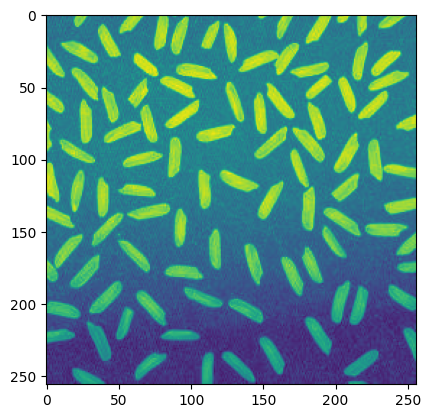

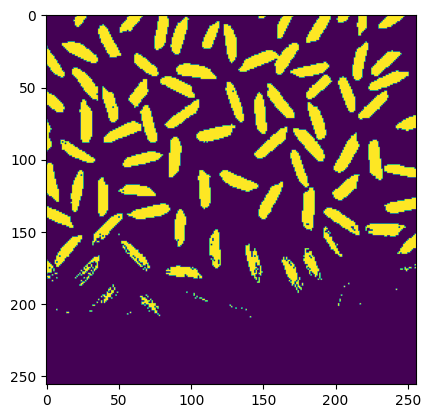

(256, 256)


In [7]:
rice = io.imread('rice.jpg')
plt.imshow(rice)
plt.show()

rice_mask = rice >160
plt.imshow(rice_mask)
plt.show()
print(rice.shape)

131


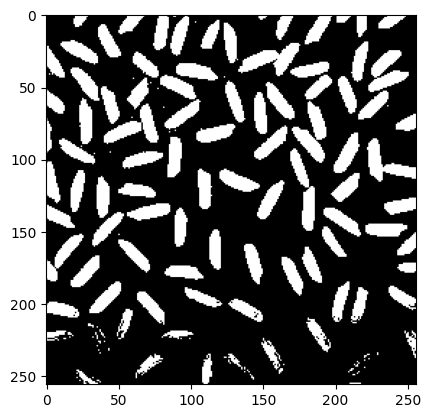

In [4]:
otsu_thresh = filters.threshold_otsu(rice)
print(otsu_thresh)

otsu_binary = rice > otsu_thresh
plt.imshow(otsu_binary, cmap='gray')
plt.show()

[[120.05628366 120.15753326 120.36069716 ... 135.2105398  134.72296929
  134.47530517]
 [120.11126885 120.21218672 120.41467195 ... 135.07791934 134.59399919
  134.3481969 ]
 [120.22304451 120.32331357 120.52447158 ... 134.8178346  134.34109974
  134.09896203]
 ...
 [ 74.24912411  74.34069678  74.52580643 ...  74.11219937  74.15014141
   74.16962326]
 [ 74.23050248  74.32354252  74.51161891 ...  73.98401934  74.01946948
   74.03767214]
 [ 74.22184584  74.31561967  74.50517995 ...  73.92051971  73.95473894
   73.97230958]]


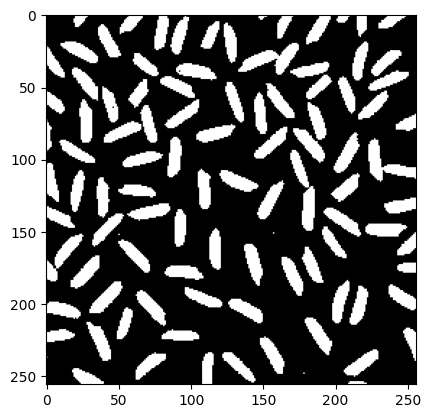

In [6]:
block_size = 55
local_thresh = filters.threshold_local(rice, block_size, offset=-20)
print(local_thresh)
local_binary = rice > local_thresh
plt.imshow(local_binary, cmap='gray')
plt.show()

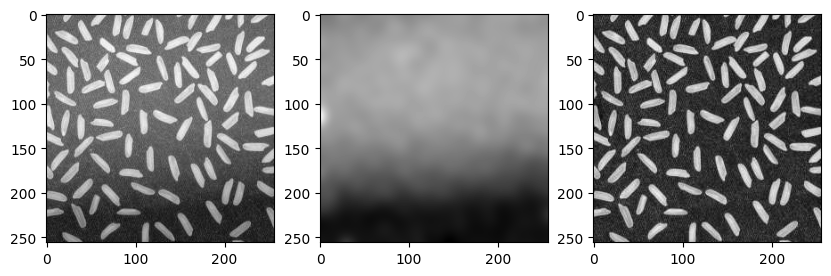

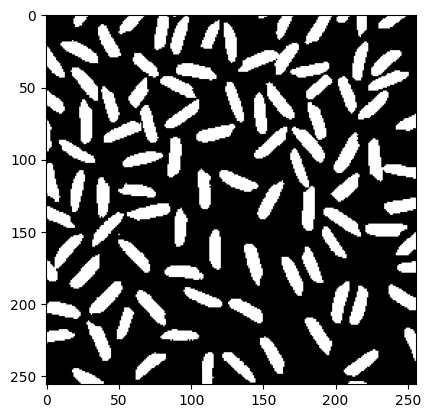

In [5]:
from skimage import morphology, img_as_float
img = img_as_float(rice)
bg = morphology.erosion(img, morphology.square(9))
bg = filters.gaussian(bg, sigma=7)
result = img - bg

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(bg, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result, cmap="gray")
plt.show()

front = result > 0.2
plt.imshow(front, cmap="gray")
plt.show()

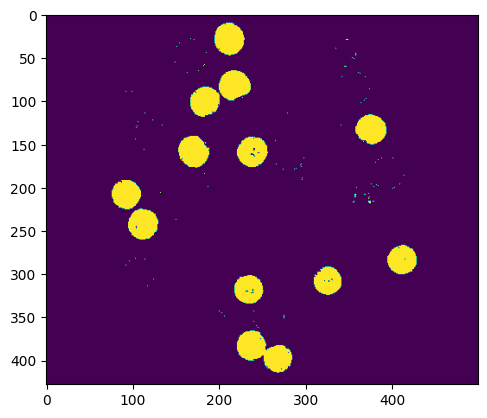

In [7]:
from skimage.color import rgb2hsv
balloon = io.imread("mm.jpg")
width = balloon.shape[1]
height = balloon.shape[0]
img = np.zeros((height,width))

balloon_hsv = rgb2hsv(balloon)
img[np.logical_and(balloon_hsv[:, :, 0]>0.3, balloon_hsv[:, :, 0]<0.37)] = 255

plt.imshow(img)
plt.show()

# Spatial Filtering: Neighborhood Operation & Smoothing Filters

## 0. Quick Recap

In [8]:
import skimage
import matplotlib.pyplot as plt

from skimage import io
from skimage import img_as_float

plt.rcParams['image.cmap'] = 'gray'

In [12]:
coins_snp = io.imread('coins.png')

print(type(coins_snp))
print(coins_snp.shape)

<class 'numpy.ndarray'>
(246, 300)


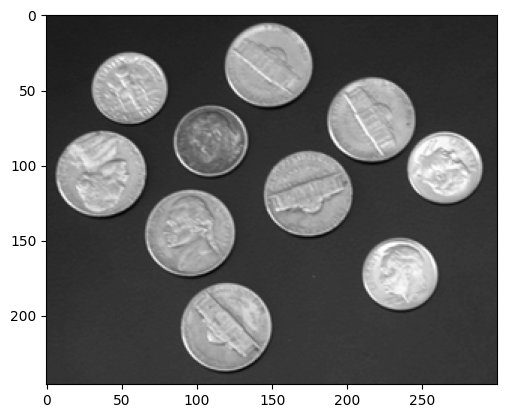

In [13]:
plt.imshow(coins_snp, cmap='gray')
plt.show()

## 1. Spatial Filtering

### Neighborhood Operations

In [14]:
from skimage.filters.rank import median, minimum, maximum, mean
from skimage.morphology import square

#### Salt-and-Pepper Noise (Median Neighborhood Operation)

In [15]:
neighborhood = square(width=3)
print(neighborhood)
coins_snp_denoised = median(coins_snp, neighborhood)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


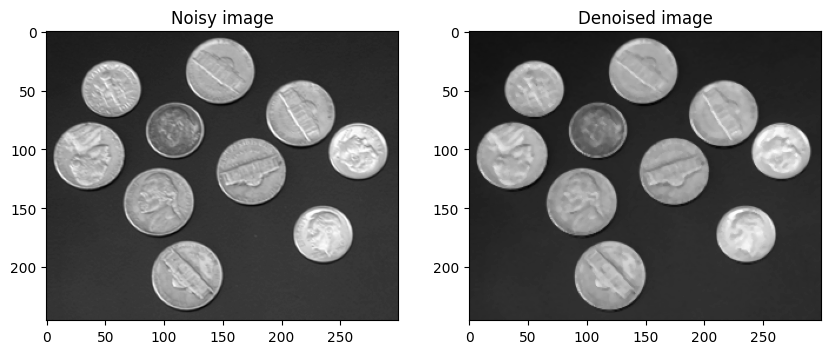

In [17]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title('Noisy image')
plt.imshow(coins_snp, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Denoised image')
plt.imshow(coins_snp_denoised, cmap='gray')
plt.show()

<b><font color='#32a852' size=4>Exercise</font></b><br>
Write a program to denoise the image ‘coins_gaussian.png’ <br>
Try different operations and neighborhood size

In [20]:
coins_gaussian = io.imread('coins_gaussian.png')

neighborhood = square(width=5)
print(neighborhood)
coins_gaussian_denoised = mean(coins_gaussian, neighborhood)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


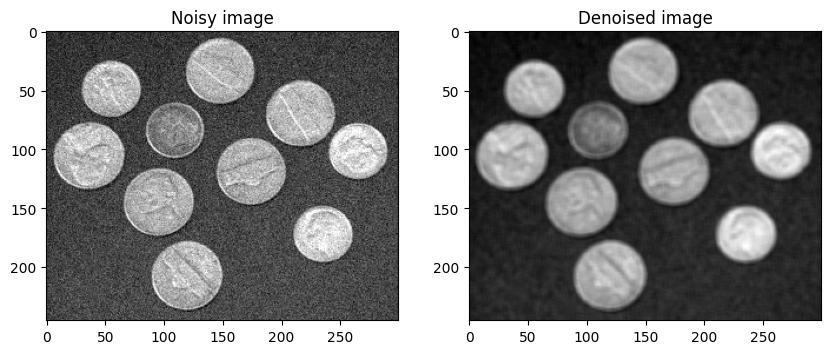

In [19]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title('Noisy image')
plt.imshow(coins_gaussian, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Denoised image')
plt.imshow(coins_gaussian_denoised, cmap='gray')
plt.show()

### Smoothing Filters

#### Smoothing vs. Sharping

C:\Users\123\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3526: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


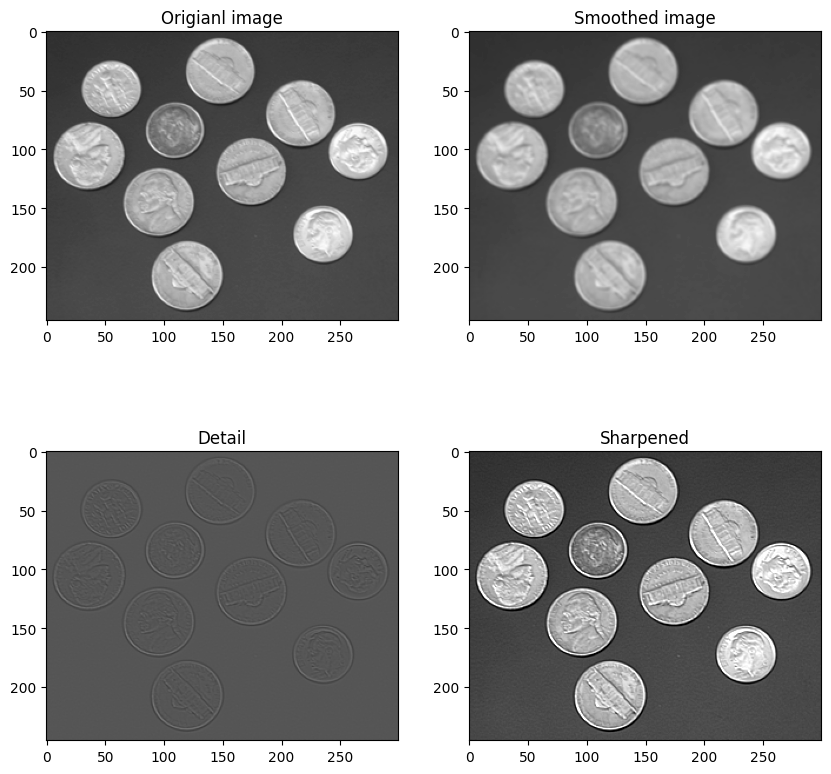

In [24]:
coins = img_as_float(io.imread('coins.png', as_gray=True))

neighborhood = square(width=3)
coins_smoothed = img_as_float(mean(coins, neighborhood))

detail = coins-coins_smoothed
coins_sharpend = coins + detail*2

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(coins, cmap='gray', vmin=0, vmax=1)
plt.title('Origianl image')
plt.subplot(2, 2, 2)
plt.imshow(coins_smoothed, cmap='gray', vmin=0, vmax=1)
plt.title('Smoothed image')
plt.subplot(2, 2, 3)
plt.imshow(detail, cmap='gray', vmin=-0.5, vmax=1)
plt.title('Detail')
plt.subplot(2, 2, 4)
plt.imshow(coins_sharpend, cmap='gray', vmin=0, vmax=1)
plt.title('Sharpened')
plt.show()

#### Convolution

In [2]:
from scipy.signal import convolve2d
import numpy as np

filter2d = np.ones((3,3))/9

coins_smoothed = convolve2d(coins, filter2d, mode='same') # 使新的圖片和原圖一樣大

plt.figure(figsize=(7, 7))
plt.imshow(coins_smoothed, cmap='gray')
plt.show()

NameError: name 'coins' is not defined

<b><font color='#32a852' size=4>Exercise</font></b><br>
1. What do images look like after convolving them with the two filters? <br>
2. Generate a filter that sharpens an image.

In [1]:
#TODO_1
red_filter = np.zeros((3,3)) # origianl
red_filter[1][1] = 1
print(red_filter)
blue_filter = np.zeros((8,8))
blue_filter[1][0] = 1
print(blue_filter)

coins_red = convolve2d(coins, red_filter, mode='same') 
coins_leftfilt = convolve2d(coins, blue_filter, mode='same')
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(coins_red, cmap='gray')
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
plt.imshow(coins_leftfilt, cmap='gray')
plt.show()

NameError: name 'np' is not defined

In [ ]:
#TODO_2
original_filter = np.zeros((3,3)) 
original_filter[1][1] = 1
smoothed_filter = np.ones((3,3))/9
detail_filter = original_filter - smoothed_filter
print(detail_filter)

sharpen_filter2d = original_filter*2 - smoothed_filter*1
coins_sharpen = convolve2d(coins, sharpen_filter2d, mode='same')
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(coins_red, cmap='gray')
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
plt.imshow(coins_sharpen, cmap='gray')

